In [26]:
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [27]:
df_1 = pd.read_csv('data/deal_VC_2000_2022.csv')
df_2 = pd.read_csv('data/Company_VCDeals.csv')

/var/folders/ml/57p2p5r56p35n0ttkg342kmw0000gn/T/ipykernel_34572/1287796945.py:1: DtypeWarning: Columns (22,28,29,45,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('data/deal_VC_2000_2022.csv')
/var/folders/ml/57p2p5r56p35n0ttkg342kmw0000gn/T/ipykernel_34572/1287796945.py:2: DtypeWarning: Columns (46,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('data/Company_VCDeals.csv')


In [28]:
# print(list(df_1.columns))
# print(list(df_2.columns))

# df_1['GrossProfit'].isna().sum()
# df_1.head()
df_1.iloc[10]

Unnamed: 0                                                                                                                          47
CompanyID                                                                                                                    100006-93
CompanyName                                                                                                                Philo Media
DealNo                                                                                                                               1
DealID                                                                                                                       40413-79T
DealDate                                                                                                                    12/03/2012
AnnouncedDate                                                                                                                      NaN
DealSize                                               

In [29]:
df = pd.merge(df_1, df_2, on='CompanyID')

In [30]:
# Cleaning up the Data and merging correctly
ten = df.head(100)
columns = list(df.columns)
if 'BusinessStatus_x' in columns: 
    print('Found')
    df.rename(columns={'BusinessStatus_x': 'Revenue_status', 'BusinessStatus_y': 'BusinessStatus'}, errors='raise', inplace='True')
else:
    print('Column not found')        

Found


In [31]:
print(f'Our data contains {len(df.columns)} number of predictors')

Our data contains 190 number of predictors


1. We create a dummy variable classifying whether the company is still in business or not based on the "BusinessStatus" column

In [32]:
# We are creating a copy of the original dataframe since we are adding another column.
df_copy = df.copy()
# print(list(df_copy.columns))
df_copy.iloc[1]

Unnamed: 0_x                                                                                                                        25
CompanyID                                                                                                                    100003-15
CompanyName_x                                                                                                                  Premama
DealNo                                                                                                                               3
DealID                                                                                                                       58843-18T
DealDate                                                                                                                    10/07/2015
AnnouncedDate                                                                                                                      NaN
DealSize                                               

In [33]:
# df_copy['BusinessStatus'].astype(str)
# status = np.unique(np.array(df_copy['BusinessStatus']))
df_copy['failed'] = np.where(((df_copy['BusinessStatus'] == 'Bankruptcy: Admin/Reorg') | (df_copy['BusinessStatus'] == 'Bankruptcy: Liquidation') | (df_copy['BusinessStatus'] == 'Out of Business')), 1,0)
df_copy.loc[(df_copy['BusinessStatus'] == 'nan')] = df['failed'] = 'nan'
;

''

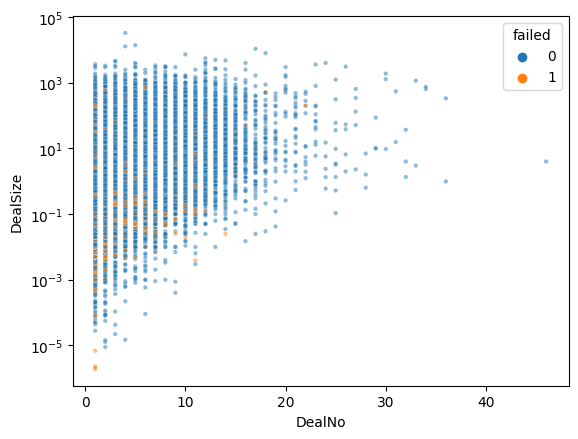

In [34]:
failed = len(df_copy.loc[df_copy['failed'] == 1])
plot = sns.scatterplot(data=df_copy, x='DealNo', y='DealSize', hue='failed', s=10, alpha=0.5)
plot.set(yscale="log")
observations = len(df_copy)
missing_values = len(df_copy.loc[(df_copy['failed'] == 'nan')])

We are having some trouble with overplotting, since there are 322943 observations of which 35189 are classified as startups who ultimately have failed and 149 observations of companies of which we don't have a status. Let's look at some summary statistics to understand some of the differences.

<AxesSubplot:xlabel='VCRound', ylabel='DealSize'>

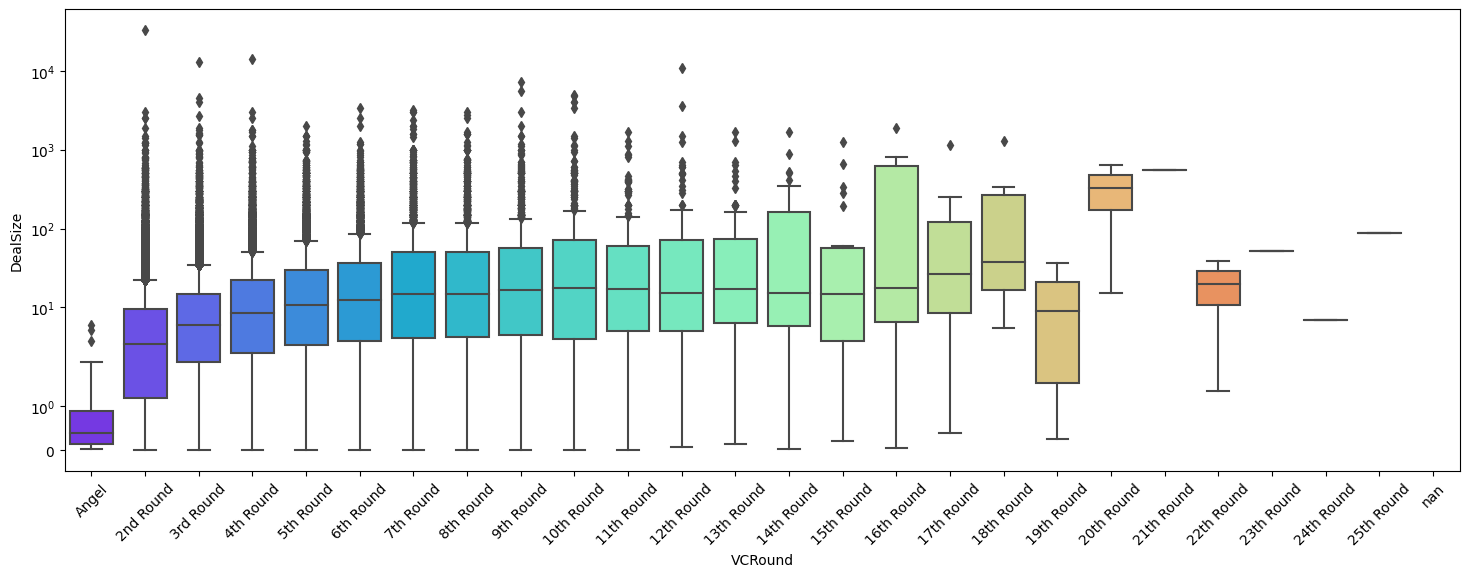

In [35]:
order = np.unique(df_copy['VCRound'].astype(str))
list_ordered = ['Angel', '2nd Round', '3rd Round']
for i in range(4,len(order)-1):
    list_ordered.append(f'{i}th Round')
list_ordered.append('nan')

# Boxplot calculated for each cycle through all structures 
fig, ax= plt.subplots(figsize=(18, 6))
ax.set_xlabel('VCRound') 
ax.set_ylabel('DealSize')
ax.set_yscale('symlog')
plt.xticks(rotation=45)
sns.boxplot(data=df_copy, x='VCRound', y='DealSize', palette='rainbow', orient="v", ax=ax, order=list_ordered)

<AxesSubplot:xlabel='Year', ylabel='DealSize'>

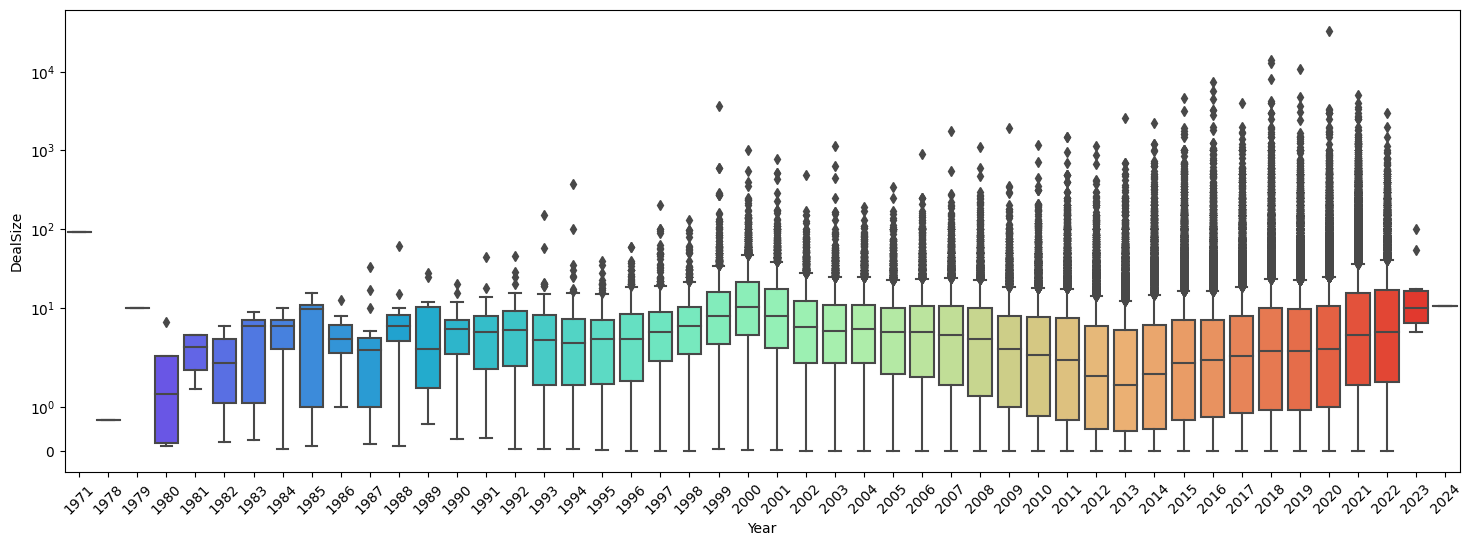

In [36]:
# df_copy['year'] = df_copy['DealDate'][-4:]

df_copy['Year'] = df_copy['DealDate'].str[-4:]
years = np.unique(df_copy['Year'].astype(str))
years.sort()
# print(df_copy['year'])
fig, ax= plt.subplots(figsize=(18, 6))
ax.set_xlabel('VCRound') 
ax.set_ylabel('DealSize')
ax.set_yscale('symlog')
plt.xticks(rotation=45)
sns.boxplot(data=df_copy, x='Year', y='DealSize', palette='rainbow', orient="v", ax=ax, order=years)

In [45]:
df_copy['Year']=df_copy['Year'].apply(pd.to_numeric, errors='coerce')
# df_copy.loc[(df_copy['Year'] == 2005) & (df_copy['Revenue_status'] == 'Generating Revenue')]

# sonder = df_copy.loc[(df_copy['CompanyName_x'] == 'HotOrigin')]

unique = np.array(df_copy['CompanyName_x'])
# df_copy.loc[(df_copy['CompanyName_x'] == '3E Nano')]
result = res = [*set(unique)]
print(len(result))

csv = pd.DataFrame(data=result)

# csv.to_excel('vc_names.xlsx')
# print(result)
# print(sonder)
# df_copy['Deal']
# print(fedex)
# print(fedex['PercentAcquired'])

159574


In [38]:
# # import matplotlib as mpl
# # import matplotlib.pyplot as plt

# # f, ax = plt.subplots(figsize=(7, 5))
# # sns.despine(f)
# sns.displot(
#     data=df_copy,
#     x='Year',
#     hue='VCRound',
#     multiple="stack",
#     palette="light:m_r",
#     edgecolor=".3",
#     linewidth=.5,
#     log_scale=False,
# )

# # ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# # ax.set_xticks([500, 1000, 2000, 5000, 10000])


In [39]:
# # g = sns.FacetGrid(df_copy, row="Year", row_order=years,
# #                   height=1.7, aspect=4,)
# # g.map(sns.kdeplot, "DealSize")

# sns.displot(
#     data=df_copy,
#     x="Year", hue="VCRound",
#     kind="kde", height=6,
#     multiple="fill", clip=(0, None),
#     palette="ch:rot=-.25,hue=1,light=.75",
# )

In [40]:
universities = ['Harvard', 'Princeton', 'MIT', 'Stanford', 'Yale', 'University of Pennsylvania', 'Berkely']
ethnicities = ['caucasian', 'african', 'asian', 'indian', 'hispanic']
gender = ['male', 'female']
names = ['Benjamin', 'Maeve', 'Simon']

data = {
    'entrepreneur': np.random.randint(0,2, size=20),
    'results_uni': np.random.choice(universities, 20),
    'ethnicities': np.random.choice(ethnicities, 20),
    'gender': np.random.choice(gender, 20)
}
df = pd.DataFrame(data)
df.head()

,entrepreneur,results_uni,ethnicities,gender
0,1,Princeton,hispanic,female
1,0,University of Pennsylvania,african,female
2,0,Yale,asian,male
3,0,MIT,caucasian,female
4,0,University of Pennsylvania,indian,female


In [41]:
total_attributes = len(universities)+len(ethnicities)+len(gender)

In [42]:
array = np.array(df)

# below is the algorithm used to calculate the affinity score between an investor and an entrepreneur
results = []
list_results = []
def function(index):
    # this loop goes to the end of the array
    for i in range(index, len(array)-1):
        if array[index][0] != array[i+1][0]:   
            dic = {
                'result': (len(set(array[index]) & set(array[i+1])))/total_attributes,
                'main_row': f'row{index}',
                'comparing_row': f'row{i+1}'
            }
            results.append(dic)
            list_x = [(len(set(array[index]) & set(array[i-1])))/total_attributes, f'row{index}', f'row{i-1}']
            list_results.append(list_x)

    # this loop takes the index and steps back
    for i in range(index, 0, -1):
        if array[index][0] != array[i-1][0]:
            dic = {
                'result': (len(set(array[index]) & set(array[i-1])))/total_attributes,
                'main_row': f'row{index}',
                'comparing_row': f'row{i-1}'
            }
            results.append(dic)
            list_x = [(len(set(array[index]) & set(array[i-1])))/total_attributes, f'row{index}', f'row{i-1}']
            list_results.append(list_x)

for i in range(0, 20):
    function(i)


In [43]:
# Creating the Matrix
list_rows = []
for i in range(0,20):
    string = f'row{i}'
    list_rows.append(string)

df_results = pd.DataFrame(columns=list_rows, index=list_rows)

# Putting the values we calculated in place
for items in results:
    df_results.at[items['comparing_row'], items['main_row']] = items['result']
df_results

,row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row16,row17,row18,row19
row0,NaN,0.071,0.0,0.071,0.071,0.0,0.071,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.071,NaN,NaN,NaN,0.071
row1,0.071,NaN,NaN,NaN,NaN,NaN,NaN,0.071,0.071,0.071,0.143,0.0,NaN,0.143,0.071,NaN,0.0,0.071,0.0,NaN
row2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.071,0.071,0.071,0.071,0.071,NaN,0.0,0.0,NaN,0.071,0.0,0.071,NaN
row3,0.071,NaN,NaN,NaN,NaN,NaN,NaN,0.071,0.071,0.071,0.0,0.0,NaN,0.071,0.071,NaN,0.0,0.143,0.071,NaN
row4,0.071,NaN,NaN,NaN,NaN,NaN,NaN,0.143,0.0,0.071,0.071,0.071,NaN,0.143,0.143,NaN,0.071,0.071,0.071,NaN
row5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.071,0.071,0.071,0.071,NaN,0.0,0.0,NaN,0.143,0.0,0.071,NaN
row6,0.071,NaN,NaN,NaN,NaN,NaN,NaN,0.143,0.0,0.143,0.0,0.0,NaN,0.071,0.071,NaN,0.0,0.071,0.0,NaN
row7,NaN,0.071,0.071,0.071,0.143,0.0,0.143,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.143,NaN,NaN,NaN,0.071
row8,NaN,0.071,0.071,0.071,0.0,0.071,0.0,NaN,NaN,NaN,NaN,NaN,0.143,NaN,NaN,0.0,NaN,NaN,NaN,0.071
row9,NaN,0.071,0.071,0.071,0.071,0.071,0.143,NaN,NaN,NaN,NaN,NaN,0.071,NaN,NaN,0.071,NaN,NaN,NaN,0.143


In [44]:
list_x = df_copy['Keywords']